In [1]:
%load_ext autoreload
%autoreload 2
import lzma
import pickle
import numpy as np
import os
from plb.utils.visualization_utils import save_numpy_as_gif
from plb.envs.multitask_env import MultitaskPlasticineEnv
env = MultitaskPlasticineEnv(cfg_path=f'roll.yml', generating_cached_state=True)
taichi_env = env.taichi_env

[Taichi] mode=release
[Taichi] preparing sandbox at /tmp/taichi-3ef7g2wb
[Taichi] version 0.7.26, llvm 10.0.0, commit e37bdb5e, linux, python 3.8.11
[I 10/13/21 21:30:47.534 116679] [shell.py:_shell_pop_print@35] Graphical python shell detected, using wrapped sys.stdout
Setting pykeops dir to  ~/.cache/pykeops_2080/
[Taichi] Starting on arch=cuda
[Tina] version 0.1.1
[Tina] Taichi properties hacked
pimirives: num primitive: 2
Building primitive
action:
  dim: 6
  scale: (0.7, 0.005, 0.005, 0.005, 0.0, 0.0)
collision_group: [0, 1]
color: (0.7568, 0.6039, 0.4196)
friction: 0.9
h: 0.3
init_pos: (0.5, 0.25, 0.5)
init_rot: (0.707, 0.707, 0.0, 0.0)
lower_bound: (0.0, 0.16, 0.0)
r: 0.03
shape: RollingPinExt
upper_bound: (1.0, 1.0, 1.0)
variations: None
Building primitive
action:
  dim: 0
  scale: ()
collision_group: [0.0, 0.0, 0.0]
color: (0.5, 0.5, 0.5)
friction: 5.0
init_pos: (0.28, 0.04, 0.5)
init_rot: (1.0, 0.0, 0.0, 0.0)
lower_bound: (0.0, 0.0, 0.0)
shape: Box
size: (0.7, 0.02, 0.43)
upp

 n


Env reset: No initial state during cache generation
Generating target, skipping setting emd
emd after reset: 0.0
======================WARNING: contact loss mask not set================


[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
<tina.mesh.trans.MeshTransform object at 0x7f8f015ac610> [[ 1.    0.    0.   -0.5 ]
 [ 0.    1.    0.   -0.55]
 [ 0.    0.    1.    1.  ]
 [ 0.    0.    0.    1.  ]]
[-0.62 -0.55 -0.44]
[1.18 0.02 1.16]
[[1.   0.   0.   0.28]
 [0.   1.   0.   0.04]
 [0.   0.   1.   0.5 ]
 [0.   0.   0.   1.  ]]
<tina.mesh.trans.MeshTransform object at 0x7f920065a0a0> [[ 1.    0.    0.   -0.05]
 [-0.    1.   -0.   -0.02]
 [-0.   -0.    1.    0.  ]
 [-0.    0.   -0.    1.  ]]
[-0.5204  0.02    0.0716]
[0.9785 0.0559 0.9284]


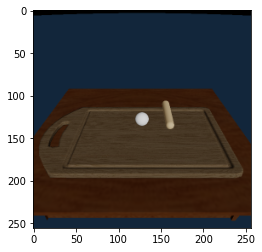

In [2]:
import matplotlib.pyplot as plt
from imitation.env_spec import set_render_mode
taichi_env.renderer.update_camera((0.3, 0.2, 0.5), 0., -0.6, 1.5)
set_render_mode(env, 'Roll-v1', 'mesh')
taichi_env.renderer.verbose = True
img = taichi_env.render(mode='rgb', img_size=256)
plt.imshow(img[:, :, :3])
# taichi_env.render(mode='human', img_size=256)

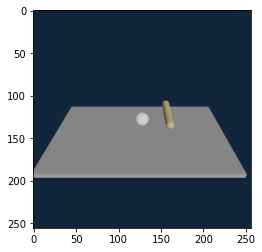

In [3]:
import matplotlib.pyplot as plt
from imitation.env_spec import set_render_mode
taichi_env.renderer.verbose = True
# taichi_env.renderer.update_camera((0.3, 0.02, 0.5), 0., 0., 2.0)
set_render_mode(env, 'Roll-v1', 'primitive')
img2 = taichi_env.render(mode='rgb', img_size=256)
plt.imshow(img2[:, :, :3])

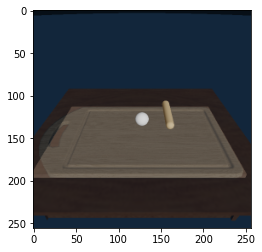

In [4]:
img3 = img * 0.6 + img2*0.4
plt.imshow(img3[:, :, :3])